In [1]:
import qgrid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import socket as socket
import os as os
import sys as sys
import multiprocessing as mp
import itertools as it
import h5py

### hapROH imports
#sys.path.insert(0,"/n/groups/reich/hringbauer/git/HAPSBURG/package/")  # hack to get development package first in path
sys.path.insert(0,"/n/groups/reich/hringbauer/git/hapBLOCK/package/hapBLOCK/IO/")  # hack to get development package first in path
from h5_load import get_coverage,get_genos_pairs,get_idx_iid,get_markers_good

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM O2 Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/hapBLOCK/"  # The Path on Harvard Cluster
else:
    raise RuntimeWarning("No compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
# Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns

print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")

sys.path.insert(0, path)

compute-e-16-233.o2.rc.hms.harvard.edu
HSM O2 Computational partition detected.
/n/groups/reich/hringbauer/git/hapBLOCK
CPU Count: 28


In [2]:
def opp_homos(g1, g2):
    """Return opposing homozygotes"""
    o1 = (g1 == 0) & (g2 == 2)
    o2 = (g1 == 2) & (g2 == 0)
    return (o1 | o2)

In [6]:
f.close()

In [7]:
f = h5py.File("./data/hdf5/1240k_v43/ch2.h5", "r") # Load for Sanity Check. See below!

j1 = get_idx_iid(f, "SUC002")
print(get_coverage(f, j1))
j2 = get_idx_iid(f, "SUC003")
print(get_coverage(f, j2))

0.6835309403930485
0.737940555465324


In [15]:
%%time
g1, g2, m = get_genos_pairs(f, sample1="SUC002", sample2="SUC003", 
                            cutoff=0.95, output=True, phased=True)

Filtering to 0.95 GP variants: 0.910x
Filtering to 0.95 GP variants: 0.927x
Filtering to common GP variants: 0.863x
CPU times: user 561 ms, sys: 67.9 ms, total: 628 ms
Wall time: 622 ms


In [16]:
idx_m = (m>0)
print(f"Markers loaded: {np.sum(idx_m)}")
g1 = g1[idx_m]
g2 = g2[idx_m]
m = m[idx_m]

Markers loaded: 42511


In [17]:
oh = opp_homos(np.sum(g1,axis=1), np.sum(g2, axis=1))
print(f"Opposing Homozygotes: {np.sum(oh)}")

Opposing Homozygotes: 1


In [18]:
idx_het = (np.sum(g1, axis=1) == 1) & (np.sum(g2, axis=1) != 1)
print(f"Het Markers loaded: {np.sum(idx_het)}")
g1,g2,m = g1[idx_het], g2[idx_het], m[idx_het]

Het Markers loaded: 4483


In [19]:
f1 = g1[:,0] == g2[:,0]
f2 = g1[:,1] == g2[:,0]

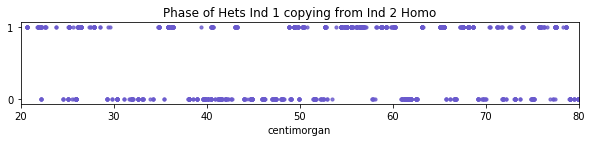

In [20]:
plt.figure(figsize=(10,1.5))
ax = plt.gca()
ax.scatter(m*100, f1, c="slateblue", s=10, alpha=0.8)
ax.set_yticks((0,1))
ax.set_xlabel("centimorgan")
ax.set_title("Phase of Hets Ind 1 copying from Ind 2 Homo")
ax.set_xlim([20,80])
plt.show()

In [88]:
f1[-50:]

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False,  True, False, False, False])

In [21]:
switch_errors = np.sum(np.diff(f1)) / ((np.max(m) - np.min(m)) * 100)
print(f"Switch errors per cM: {switch_errors:.4f}")

Switch errors per cM: 0.9127


In [22]:
switch_errors = np.mean(np.diff(f1))
print(f"Switch errors per het: {switch_errors:.4f}")

Switch errors per het: 0.0544
